In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import itertools
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [ ]:
train=pd.read_csv('NSL_Dataset\Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset\Test.txt',sep=',')

In [ ]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"]

In [ ]:
len(columns)

43

In [ ]:
train.columns=columns
test.columns=columns

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [ ]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') |
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') |
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') |
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') |
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') |
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') |
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') |
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [ ]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') |
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') |
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') |
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') |
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') |
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') |
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') |
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [ ]:
train.shape

(125972, 44)

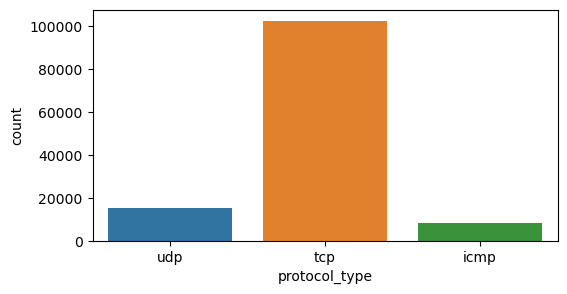

In [ ]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

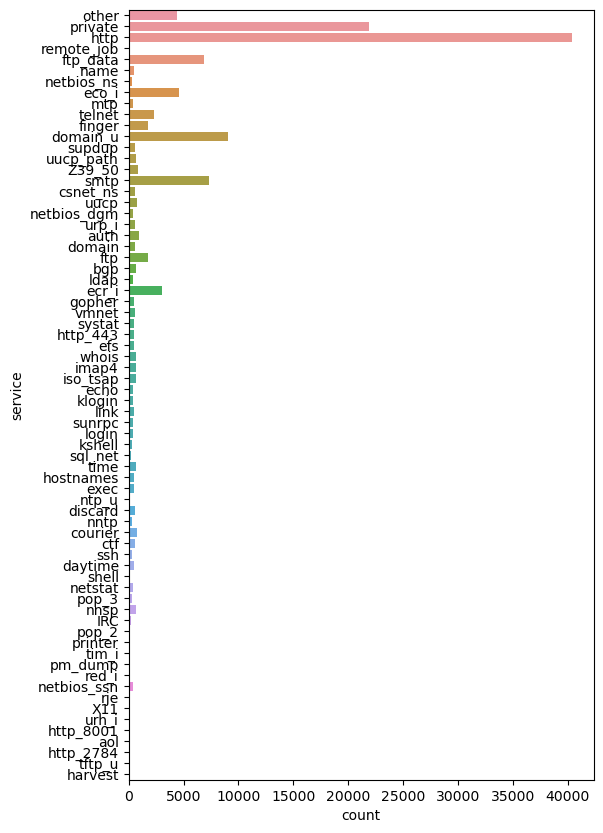

In [ ]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

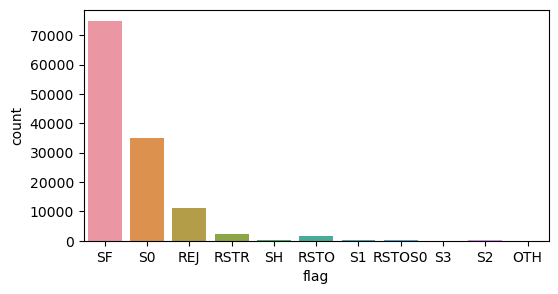

In [ ]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

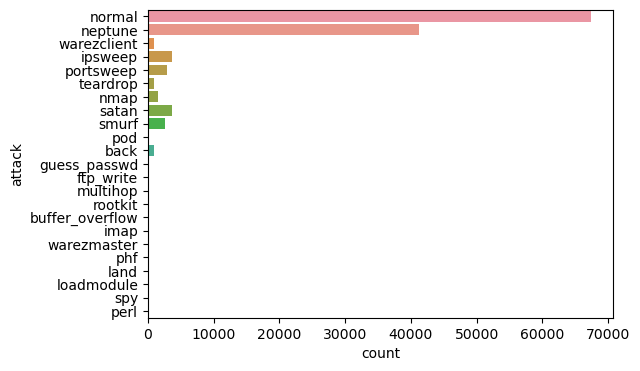

In [ ]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

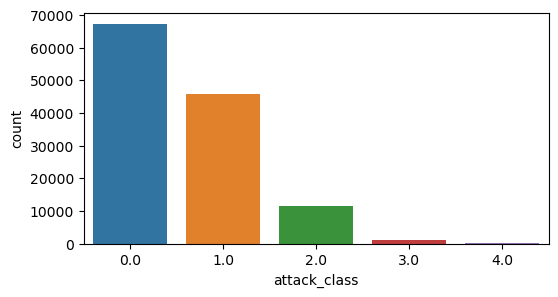

In [ ]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

In [ ]:
train.groupby('attack_class').mean().T

C:\Users\Admin\AppData\Local\Temp\ipykernel_12012\1593307576.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('attack_class').mean().T


attack_class,0.0,1.0,2.0,3.0,4.0
duration,168.589899,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230658,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710656,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507083,0.019226,0.000601,0.077387,1.211538
